In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
df = pd.read_csv("Simulation_data.csv")
display(df[8000:9000])

C:\Users\frede\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,acc_x,acc_y,acc_z,vel_x,vel_y,vel_z,ang_acc_roll,ang_acc_pitch,ang_acc_yaw,ang_vel_roll,...,x3,x4,x5,x6,u1_d,u2_d,u3_d,pwm_1,pwm_2,pwm_3
8000,0.0,0.0,-0.042639,1.990004,0.0,-0.006629,0.0,-0.051451,0.0,0.0,...,0.021990,-0.001451,-0.032956,0.045519,-0.745718,-0.761418,0.601476,-47.501478,-47.589593,46.130730
8001,0.0,0.0,-0.048767,1.990004,0.0,-0.006883,0.0,-0.050415,0.0,0.0,...,0.021982,-0.001519,-0.032655,0.059963,-0.745718,-0.761418,0.601476,-47.501478,-47.589593,46.130730
8002,0.0,0.0,-0.054668,1.990004,0.0,-0.007168,0.0,-0.049200,0.0,0.0,...,0.021974,-0.001584,-0.032314,0.074058,-0.745718,-0.761418,0.601476,-47.501478,-47.589593,46.130730
8003,0.0,0.0,-0.060356,1.990004,0.0,-0.007484,0.0,-0.047840,0.0,0.0,...,0.021966,-0.001647,-0.031897,0.087764,-0.745718,-0.761418,0.601476,-47.501478,-47.589593,46.130730
8004,0.0,0.0,-0.065777,1.990005,0.0,-0.007831,0.0,-0.046328,0.0,0.0,...,0.021958,-0.001707,-0.031398,0.101037,-0.745718,-0.761418,0.601476,-47.501478,-47.589593,46.130730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.0,0.0,0.098759,1.990063,0.0,-0.077940,0.0,-0.007397,0.0,0.0,...,0.006997,-0.009861,-0.046104,-0.009075,-0.677906,-0.683401,0.758185,0.000000,0.000000,-45.795899
8996,0.0,0.0,0.098616,1.990063,0.0,-0.077446,0.0,-0.008131,0.0,0.0,...,0.006997,-0.009859,-0.046104,-0.006746,-0.677906,-0.683401,0.758185,0.000000,0.000000,-45.795899
8997,0.0,0.0,0.098367,1.990063,0.0,-0.076950,0.0,-0.008833,0.0,0.0,...,0.006850,-0.009859,-0.046234,-0.004215,-0.677906,-0.683401,0.758185,0.000000,0.000000,-45.795899
8998,0.0,0.0,0.097896,1.990062,0.0,-0.076461,0.0,-0.009576,0.0,0.0,...,0.006850,-0.009860,-0.046234,-0.001471,-0.677906,-0.683401,0.758185,0.000000,0.000000,-45.795899


In [54]:
#print(0.006571419*1.99*(5.1**2)*998/2)
#print(4*5**2)
#print(4/(1.99*998)*2)
#0.00657*1.99*998/2
print(170*np.sin(np.deg2rad(-5)))


-14.816476267101889


<AxesSubplot:>

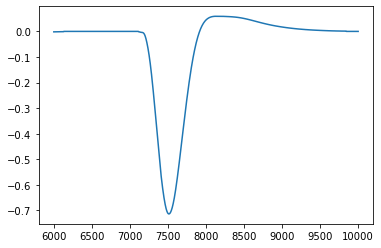

In [40]:

df["x5"][6000:10000].plot()


<AxesSubplot:>

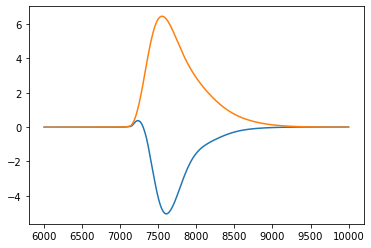

In [44]:
df["u2"][6000:10000].plot()
df["u3"][6000:10000].plot()

<AxesSubplot:>

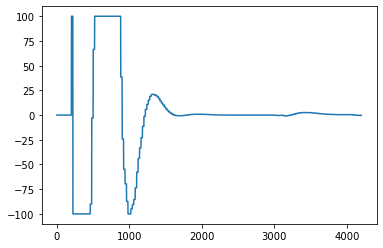

In [56]:
df["pwm_1"].plot()


<AxesSubplot:>

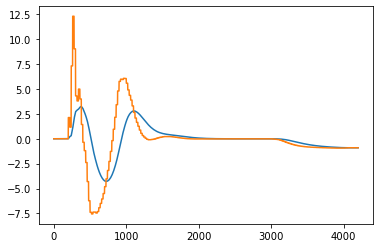

In [57]:
df["u3"].plot()
df["u3_d"].plot()

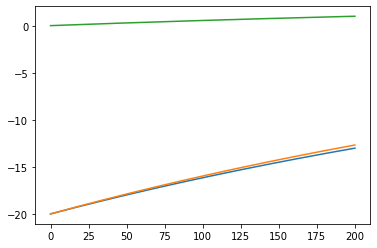

In [58]:
import numpy as np
import matplotlib.pyplot as plt
diff = 0
prev_angles = np.array([-20,-20,0])[:,np.newaxis]
real_angles = np.array([-20,-20,0])[:,np.newaxis]
t = np.linspace(0,200,201)
def wing_pid2(da1,da2,da3):
    global prev_angles, real_angles, diff
    desired_angles = np.vstack((da1, da2, da3))

    error_angles = desired_angles - prev_angles
    #print(error_angles)
    Kp_a = 0.002
    Kd_a = 0.01

    real_angles = prev_angles + error_angles*Kp_a + diff * Kd_a
    diff = real_angles - prev_angles
    prev_angles = real_angles
    return real_angles[0], real_angles[1], real_angles[2]

angler1 = []
angler2 = []
angler3 = []
for x in range(201):
    angles1, angles2, angles3 = wing_pid2(1,2,3)
    angler1.append(angles1)
    angler2.append(angles2)
    angler3.append(angles3)
    
plt.plot(t,angler1)
plt.plot(t,angler2)
plt.plot(t,angler3)
plt.show()


<AxesSubplot:>

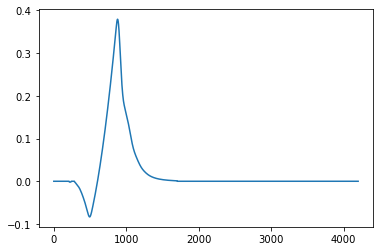

In [59]:
df["roll"].plot()



# State space representation

#### Define symbols

In [45]:
import sympy as sy
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
m, g, rho, Vol, S1, S2, S3, S4, u, x1, x2, x3, x4, x5, x6, dh1,dh2, dr1,dr2,dp1,dp2 = symbols("m g rho Vol S1 S2 S3 S4 u x1 x2 x3 x4 x5 x6 dh1 dh2 dr1 dr2 dp1 dp2")
u1, u2, u3, r1, Iyx, Ixz, Iyz, Zw, xG, dg, db, d1, d2, d3, d4, F_drag, S2_flap, S4_flap, d2_flap, d4_flap = symbols("u1 u2 u3 r1 Iyx Ixz Iyz Zw xG dg db d1 d2 d3 d4 F_drag S2_flap S4_flap d2_flap d4_flap")
x2d, x4d, x6d, Ix, Kp, Ixy, Iy, Mq = symbols("x2d x4d x6d Ix Kp Ixy Iy Mq")

#### Force equations

In [33]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*cos(x5) + rho*Vol*g*cos(x5) + 2*(1/2*rho*1/8*x5*S1*(x2**2+u**2) + 1/2*rho*1/8*x5*S3*(x2**2+u**2)+1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)) + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)+1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = damping_p -m*g*dg*cos(x5) + db*rho*Vol*g*cos(x5) + 2*1/2*rho*1/8*x5*S1*(x2**2+u**2)*d1 + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*d2 + 2*1/2*rho*1/8*x5*S3*(x2**2+u**2)*d3 + 2*1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)*d4 + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

In [3]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*sin(x5) + rho*Vol*g*sin(x5) + 2*(1/2*rho*1/8*x5*S1*(x2**2+u**2) + 1/2*rho*1/8*x5*S3*(x2**2+u**2)+1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)) + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)+1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = damping_p -m*g*dg*sin(x5) + db*rho*Vol*g*sin(x5) + 2*1/2*rho*1/8*x5*S1*(x2**2+u**2)*d1 + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*d2 + 2*1/2*rho*1/8*x5*S3*(x2**2+u**2)*d3 + 2*1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)*d4 + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

#### Force equation with restoring force

In [4]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*cos(x5) + rho*Vol*g*cos(x5) + 2*(1/2*rho*1/8*x5*S1*(x2**2+u**2) + 1/2*rho*1/8*x5*S3*(x2**2+u**2)+1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)) + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)+1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = F_drag * (-sin(3.14/180 * (x5))) + damping_p -m*g*dg*cos(x5) + db*rho*Vol*g*cos(x5) + 2*1/2*rho*1/8*x5*S1*(x2**2+u**2)*d1 + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*d2 + 2*1/2*rho*1/8*x5*S3*(x2**2+u**2)*d3 + 2*1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)*d4 + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

#### Force equation withouth x2 term in lift

In [34]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*cos(x5) + rho*Vol*g*cos(x5) + 2*(1/2*rho*1/8*x5*S1*(u**2) + 1/2*rho*1/8*x5*S3*(u**2)+1/2*rho*1/8*(x5-u3)*S4*(u**2)) + 1/2*rho*1/8*(x5)*S2*(u**2) + 1/2*rho*1/8*(x5-u1)*S2_flap*(u**2) + 1/2*rho*1/8*(x5)*S2*(u**2) + 1/2*rho*1/8*(x5-u2)*S2_flap*(u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(x5-u1)*S2_flap*(u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2_flap*(u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = -F_drag * (sin(3.14/180 * (x5))) + damping_p -m*g*dg*cos(x5) + db*rho*Vol*g*cos(x5) + 2*1/2*rho*1/8*x5*S1*(u**2)*d1 + 1/2*rho*1/8*(x5)*S2*(u**2)*d2 + 1/2*rho*1/8*(x5-u1)*S2_flap*(u**2)*d2_flap + 1/2*rho*1/8*(x5)*S2*(u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2_flap*(u**2)*d2_flap + 2*1/2*rho*1/8*x5*S3*(u**2)*d3 + 2*1/2*rho*1/8*(x5)*S4*(u**2)*d4 + 2*1/2*rho*1/8*(x5-u3)*S4_flap*(u**2)*d4_flap + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

#### Force equation withouth x5 term in lift

In [2]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*cos(x5) + rho*Vol*g*cos(x5) + 2*(1/2*rho*1/8*0*S1*(u**2) + 1/2*rho*1/8*0*S3*(u**2)+1/2*rho*1/8*(0-u3)*S4_flap*(u**2)) + 1/2*rho*1/8*(0-u1)*S2_flap*(u**2)+1/2*rho*1/8*(0-u2)*S2_flap*(u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(0-u1)*S2_flap*(u**2)*r1 - 1/2*rho*1/8*(0-u2)*S2_flap*(u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = F_drag * (-sin(3.14/180 * (x5))) + damping_p -m*g*dg*cos(x5) + db*rho*Vol*g*cos(x5) + 2*1/2*rho*1/8*0*S1*(u**2)*d1 + 1/2*rho*1/8*(0-u1)*S2_flap*(u**2)*d2_flap + 1/2*rho*1/8*(0-u2)*S2_flap*(u**2)*d2_flap + 2*1/2*rho*1/8*0*S3*(u**2)*d3 + 2*1/2*rho*1/8*(0-u3)*S4_flap*(u**2)*d4_flap + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u


#### M*a equations

In [3]:
#Heave mass-acceleration product
Ma1 = x2d*(m+Zw) - x6d*m*xG
#Roll mass-acceleration product
Ma2 = x4d*(Ix+Kp) - x6d*Ixy
#Pitch mass-acceleration product
Ma3 = -x2d*m*xG - x4d*Ixy + x6d*(Iy+Mq)

#Define equations
eq1 = sy.Eq(F1, Ma1)
eq2 = sy.Eq(F2, Ma2)
eq3 = sy.Eq(F3, Ma3)

#### Solving for x2d, x4d and x6d - little slow

In [4]:
#

r = sy.solve((eq1,eq2,eq3),(x2d,x4d,x6d))

r_list = list(r.items())

print("---------------------------------------------X2D-------------------------------------------")
print(str(r_list[0]))
print("---------------------------------------------X4D-------------------------------------------")
print(str(r_list[1]))
print("---------------------------------------------X6D-------------------------------------------")
print(str(r_list[2]))


---------------------------------------------X2D-------------------------------------------
(x2d, 16.0*F_drag*Ix*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0

#### Define x2d,x4d and x6d (A_math_split)

In [37]:
x2d = 16.0*F_drag*Ix*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Iy*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iy*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2_flap*d2_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy**2*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy**2*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*r1*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*m*r1*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Iy*Kp*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Kp*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2_flap*d2_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [38]:
x4d = 16.0*F_drag*Ixy*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ixy*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2_flap*Zw*d2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2_flap*d2_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4_flap*Zw*d4_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4_flap*d4_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*m**2*x4*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iyx*m**2*x6**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - S2_flap*m**2*r1*rho*u**2*u1*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + S2_flap*m**2*r1*rho*u**2*u2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr1*m**2*x4*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr2*m**2*x4**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [39]:
x6d = 16.0*F_drag*Ix*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ix*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2_flap*Zw*d2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2_flap*d2_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4_flap*Zw*d4_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2_flap*Zw*d2_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2_flap*d2_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2_flap*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4_flap*Zw*d4_flap*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

#### Define x2d,x4d and x6d (A_math)

In [16]:
x2d = 16.0*F_drag*Ix*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Iy*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iy*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy**2*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy**2*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Iy*Kp*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Kp*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [17]:
x4d = 16.0*F_drag*Ixy*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ixy*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*m**2*x4*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iyx*m**2*x6**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - S2*m**2*r1*rho*u**2*u1*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + S2*m**2*r1*rho*u**2*u2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr1*m**2*x4*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr2*m**2*x4**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [18]:
x6d = 16.0*F_drag*Ix*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ix*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

#### Define x2d,x4d and x6d (A_Hakim)

In [2]:
x2d = 16.0*F_drag*Ix*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*xG*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Iy*S4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iy*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Mq*S4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy**2*S4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy**2*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*r1*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*m*r1*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Iy*Kp*S4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Kp*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*Mq*S4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Mq*Vol*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [3]:
x4d = 16.0*F_drag*Ixy*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ixy*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*m**2*x4*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iyx*m**2*x6**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - S2_flap*m**2*r1*rho*u**2*u1*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + S2_flap*m**2*r1*rho*u**2*u2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr1*m**2*x4*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr2*m**2*x4**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [4]:
x6d = 16.0*F_drag*Ix*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Ix*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*Zw*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*F_drag*Kp*m*sin(0.0174444444444444*x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2_flap*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2_flap*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*Zw*d2_flap*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*Zw*d2_flap*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*d2_flap*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2_flap*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*Zw*d4_flap*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*d4_flap*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4_flap*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*Zw*db*g*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*g*m*rho*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dg*g*m*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*g*m**2*xG*cos(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

#### Insert parameter values to symbols

In [21]:
# Inserval values to equations
syms = [m,      g, rho,   Vol,    S1,S2_flap,    S2,    S3, S4_flap,  S4, u,  Zw, Kp, Mq, xG,    r1, Iyx, Ixy, Ixz, Iyz,   dg,   db,   d1, d2_flap,  d2,    d3,  d4_flap, d4, Ix ,Iy, dh1, dh2,dr1,dr2,dp1,dp2, F_drag] 

#USED FOR GENERTAING STRING TO INPUT FOR SUBSTITUION
string = "["
for j in range(len(syms)):
    string += f"({syms[j]},{syms[j]}_val),"
string = string[:-1]
string += "]"
print(string)

# u_val symbol
u_val = symbols("u_val")
F_drag = symbols("F_drag")

# antagelse af pivot = center of gravity (dg_val = 0)
# antagelse af center of gravity = center of bouyancy (indtil fredes far reder vores røv)
a = 10/10
m_val = 29.3        #29.3 Ændrer: +[2,2] -[2,4] -[2,5]
g_val = 9.82        #Ændrer intet når ændres pga g = b
rho_val = 997       # +[2,4] -[6,4] og HELE B
Vol_val = 0.029388  #Ændrer intet    Bestemt ud fra 1.5 Kg opdrift
S1_val = 0.0051     # +[2,5] +[6,5]                  #0.0051*a  
S2_flap_val = 0#0.0195
S2_val = 0.095 - S2_flap_val                      #0.2*0.053+0.089*0.2*1/2       # +[2,5] +[6,5] og HELE B        #0.095*a 
S3_val = 0.0693      # +[2,5] -[6.5]                  #0.0693*a    
S4_flap_val = 0#0.02736
S4_val = 0.044 - S4_flap_val         # 2*0.19*0.072       # +[2,5] -[6.5] og HELE B        #0.044*a   
u_val = u_val           # +[2,5] -[2,6]  -[4,2] +[4,5]  +[6,2] -[6,4] og HELE B
Zw_val = 87          #151  +[2,2] -[2,5] +[2,6]  -[4,2] +[6,2]
Kp_val = 2.3         # 21   +[4,2] +[4,4] -[4,5]  -[4,6] og HELE +x4 i B
Mq_val = 12          # 7  +[4,2] -[4,5] -[4,6] -[6,2] +[6,5] +[6,6] 
xG_val = 0
r1_val = 0.288       # +x4 fra u1 u2 i B
Iyx_val = -0.059     #-0.059  Ændrer intet når ændres pga lineraisering 
Ixy_val = -0.059     #-0.059   -[4,2] -[4,4] +[4,5] +[4,6]   +[6,2] +[6,4] -[6,5] . Gør den skæv i pitch på u1, u2
Ixz_val = 0.25       #0.25    Ændrer intet når ændres pga lineraisering 
Iyz_val = 0.01255    #0.01255 Ændrer intet når ændres pga lineraisering 
dg_val = 0
db_val = 0
d1_val = 0.14        # +[6,5] 
d2_flap_val = -0.12 
d2_val = 0.09       # +[6.5] og stærekre u1, u2 i x6
d3_val = -0.1        # MERE NEGATIV -> -[6,5]
d4_flap_val = -0.578
d4_val = -0.475        ## MERE NEGATIV -> -[6,5] og stærekre u3 i x6
Ix_val = 8
Iy_val = 19

#Damping coefficients for linear term
dh1_val = 4 #0.9    #OLD: 0.9  #new old :4  -[2,2]
dr1_val = 3 #0.8   #OLD: 0.35 -[4,4]
dp1_val = 4 #0.9   #OLD: 0.36  #New old: 4 -[6,6]
 
#Damping coefficients for quadratic term
dh2_val = 1
dr2_val = 1
dp2_val = 1

#Drag:
F_drag_val = (0.000657*1.99*u_val**2*997/2) #+[4.5] -[6.5]

2*1029/(1.99*2**2*997)

#Artificial damping


[(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2_flap,S2_flap_val),(S2,S2_val),(S3,S3_val),(S4_flap,S4_flap_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2_flap,d2_flap_val),(d2,d2_val),(d3,d3_val),(d4_flap,d4_flap_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val),(F_drag,F_drag_val)]


0.2593206755946231

In [22]:
d2_val, d2_flap_val

(0.09, -0.12)

#### With damping

In [23]:
x2d_equ = x2d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2_flap,S2_flap_val),(S2,S2_val),(S3,S3_val),(S4_flap,S4_flap_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2_flap,d2_flap_val),(d2,d2_val),(d3,d3_val),(d4_flap,d4_flap_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val),(F_drag,F_drag_val)])
x4d_equ = x4d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2_flap,S2_flap_val),(S2,S2_val),(S3,S3_val),(S4_flap,S4_flap_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2_flap,d2_flap_val),(d2,d2_val),(d3,d3_val),(d4_flap,d4_flap_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val),(F_drag,F_drag_val)])
x6d_equ = x6d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2_flap,S2_flap_val),(S2,S2_val),(S3,S3_val),(S4_flap,S4_flap_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2_flap,d2_flap_val),(d2,d2_val),(d3,d3_val),(d4_flap,d4_flap_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val),(F_drag,F_drag_val)])


#### Lineratization

In [24]:
x_list = [x1,x2,x3,x4,x5,x6,u1,u2,u3]
#Heave acceleration equation
dif1_x1 = sy.diff(x2d_equ, x1) 
dif1_x2 = sy.diff(x2d_equ, x2) 
dif1_x3 = sy.diff(x2d_equ, x3) 
dif1_x4 = sy.diff(x2d_equ, x4) 
dif1_x5 = sy.diff(x2d_equ, x5)
dif1_x6 = sy.diff(x2d_equ, x6) 
dif1_u1 = sy.diff(x2d_equ, u1) 
dif1_u2 = sy.diff(x2d_equ, u2) 
dif1_u3 = sy.diff(x2d_equ, u3) 

#Roll acceleration equation
dif2_x1 = sy.diff(x4d_equ, x1) 
dif2_x2 = sy.diff(x4d_equ, x2) 
dif2_x3 = sy.diff(x4d_equ, x3) 
dif2_x4 = sy.diff(x4d_equ, x4) 
dif2_x5 = sy.diff(x4d_equ, x5) 
dif2_x6 = sy.diff(x4d_equ, x6) 
dif2_u1 = sy.diff(x4d_equ, u1) 
dif2_u2 = sy.diff(x4d_equ, u2) 
dif2_u3 = sy.diff(x4d_equ, u3) 

#Pitch acceleration equation
dif3_x1 = sy.diff(x6d_equ, x1) 
dif3_x2 = sy.diff(x6d_equ, x2) 
dif3_x3 = sy.diff(x6d_equ, x3) 
dif3_x4 = sy.diff(x6d_equ, x4) 
dif3_x5 = sy.diff(x6d_equ, x5) 
dif3_x6 = sy.diff(x6d_equ, x6) 
dif3_u1 = sy.diff(x6d_equ, u1) 
dif3_u2 = sy.diff(x6d_equ, u2) 
dif3_u3 = sy.diff(x6d_equ, u3)

list_diff = [dif1_x1, dif1_x2, dif1_x3, dif1_x4, dif1_x5, dif1_x6, dif1_u1, dif1_u2, dif1_u3, dif2_x1, dif2_x2, dif2_x3, dif2_x4, dif2_x5, dif2_x6, dif2_u1, dif2_u2, dif2_u3, dif3_x1, dif3_x2, dif3_x3, dif3_x4, dif3_x5, dif3_x6, dif3_u1, dif3_u2, dif3_u3]

list_diff_sub = []
for k in range(27):
    list_diff_sub.append(list_diff[k].subs([(x1, 1),(x2, 0),(x3, 0),(x4, 0),(x5, 0),(x6, 0),(u1, 0),(u2, 0),(u3, 0)]))
#print(list_diff_sub[4])

x2d_val = list_diff_sub[0:9]
x4d_val = list_diff_sub[9:18]
x6d_val = list_diff_sub[18:27]
x1, x2, x3, x4, x5, x6 = symbols("x1 x2 x3 x4 x5 x6")

#print(dif1_x5)

#### Develop state space representation from linerized data and with symbols

In [25]:
A = zeros(6,6)
o = 0
for j in range(3):
    for k in range(6):
        x=(k+o)
        A[2*j+1,k] = list_diff_sub[x]
    o += 9
A[0,1] = 1
A[2,3] = 1
A[4,5] = 1

o = 0
B = zeros(6,3)
for j in range(3):
    for k in range(3):
        x = k+o+6
        B[2*j+1, k] = list_diff_sub[x]
    o += 9

C = np.array([[1, 0, 0, 0, 0, 0], 
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0]])

D = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])
print("A")
print(N(A,3))
print()
print("B")
print(N(B,3))


A
Matrix([[0, 1.00, 0, 0, 0, 0], [0, -0.0344, 0, 0, 0.229*u_val**2, -0.252*u_val], [0, 0, 0, 1.00, 0, 0], [0, -0.0161*u_val, 0, -0.291, 0.00043*u_val**2, 0.000739], [0, 0, 0, 0, 0, 1.00], [0, 2.81*u_val, 0, 0.000554, -0.075*u_val**2, -0.129]])

B
Matrix([[0, 0, 0], [-0.0509*u_val**2, -0.0509*u_val**2, -0.0471*u_val**2], [0, 0, 0], [-0.165*u_val**2, 0.166*u_val**2, -0.000481*u_val**2], [0, 0, 0], [-0.0169*u_val**2, -0.0175*u_val**2, 0.084*u_val**2]])


#### Develop state space represention from linerized data

In [10]:
A = np.zeros((6,6))
o = 0
for j in range(3):
    for k in range(6):
        x=(k+o)
        A[2*j+1,k] = list_diff_sub[x]
    o += 9
A[0,1] = 1
A[2,3] = 1
A[4,5] = 1

o = 0
B = np.zeros((6,3))
for j in range(3):
    for k in range(3):
        x = k+o+6
        B[2*j+1, k] = list_diff_sub[x]
    o += 9

C = np.array([[1, 0, 0, 0, 0, 0], 
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0]])

D = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])
print("A")
print(A)
print()
print("A_Prev")
print(A_prev)
print()
print("B")
print(B)
print()
print("B_prev")
print(B_prev)
print()
print(A - A_prev)
print()
print(B - B_prev)
print()
               
               
A_prev = A
B_prev = B


TypeError: can't convert expression to float

In [27]:
A

array([[0.000, 1.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, -0.370, 0.000, 0.000, 5.717, -1.260],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [0.000, -0.080, 0.000, -0.146, 0.013, 0.001],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 14.032, 0.000, 0.000, -2.320, -0.210]])

In [28]:
PID

array([[0.000, 0.000, 0.000],
       [-1.273, -1.273, -1.179],
       [0.000, 0.000, 0.000],
       [-4.137, 4.140, -0.013],
       [0.000, 0.000, 0.000],
       [-0.255, -0.270, 2.211]])

In [155]:
D

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

# State space controller

In [25]:
import control as ct
desired_poles = [-11.8, -3.3, -0.6,-0.9, (-1.5+1.4j),(-1.5-1.4j)]
K=ct.place(A,B,desired_poles)
K


ModuleNotFoundError: No module named 'control'

In [90]:
desired_poles1 = [0, -2, 0,0, (-2+1j),(-2-1j)]
K=ct.place(A,B,desired_poles1)
K

array([[-0.000, -8.356, 0.000, 0.532, -1.747, 2.505],
       [-0.000, -7.147, 0.000, 1.330, -1.747, 1.113],
       [0.000, 8.571, 0.000, 0.027, -1.123, 0.706]])

In [88]:
abk = A - B@K
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(abk)

[[0.000 1.000 0.000 0.000 0.000 0.000]
 [-0.000 -3.851 0.000 1.375 -0.000 2.423]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [-0.000 -1.569 -0.000 -1.051 0.000 1.810]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [-0.000 -0.900 0.000 0.424 0.000 -1.098]]


# Eigenvalues (poles)

0j
0j
(-1.6535904314177534+5.134249306758158j)
(-1.6535904314177534-5.134249306758158j)
(2.7277661218037985+0j)
(-0.14563106786945137+0j)

 Poles for compensated system


NameError: name 'K' is not defined

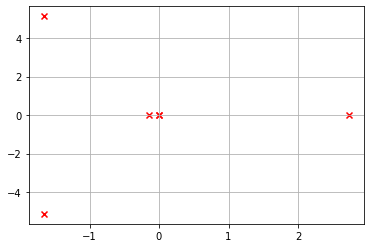

In [23]:
[eigenval, v] = np.linalg.eig(A)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="red")
plt.grid()

print("\n Poles for compensated system")
[eigenval, v] = np.linalg.eig(A-B@K)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="green")
plt.grid()

# Controllability

In [222]:
R = np.hstack([B, A@B, A**2 @ B,A**3 @ B,A**4 @ B, A**5 @ B])
np.linalg.matrix_rank(R)

#OR: 
#import control as ct
#R = ct.ctrb(A, B)

6

## LQR

In [223]:
import scipy as sp
import control as ct
sys = sp.signal.lti(A,B,C,D)
print(sys)
type(sys)

StateSpaceContinuous(
array([[0.000, 1.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, -0.034, 0.000, 0.000, 0.915, -0.504],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [0.000, -0.032, 0.000, -0.291, 0.002, 0.001],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 5.613, 0.000, 0.001, -0.371, -0.129]]),
array([[0.000, 0.000, 0.000],
       [-0.204, -0.204, -0.189],
       [0.000, 0.000, 0.000],
       [-0.662, 0.662, -0.002],
       [0.000, 0.000, 0.000],
       [-0.041, -0.043, 0.354]]),
array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]]),
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]]),
dt: None
)


scipy.signal.ltisys.StateSpaceContinuous

In [24]:
Q = np.array([[290.000, 0.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 50.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 1.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 0.000, 1, 0.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 45.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 0.000, 300.00]])

R = np.array([[6.900, 0.000, 0.000],
              [0.000, 6.900, 0.000],
              [0.000, 0.000, 41.400]])


"""Q = np.array([[80.000, 0.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 30.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 5.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 0.000, 1, 0.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 150.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 0.000, 35.0]])


LQR_R = np.array([[0.7, 0.000, 0.000],
                  [0.000, 0.7, 0.000],
                  [0.000, 0.000, 3.5]])
"""

K, S, E = ct.lqr(A, B, Q, LQR_R)
K

NameError: name 'ct' is not defined

In [225]:
A-B@K

array([[0.000, 1.000, 0.000, 0.000, 0.000, 0.000],
       [-12.106, -13.647, -0.001, -0.001, -0.503, -0.854],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [-0.041, -0.047, -4.682, -3.144, 0.016, 0.024],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [8.153, 9.724, 0.007, 0.003, -1.587, -3.018]])

In [26]:
[eigenval, v] = np.linalg.eig(A-B@K)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="red")
plt.grid()

NameError: name 'K' is not defined

In [244]:
u = (ref-output) * p + (error_prev-error) * d

ValueError: operands could not be broadcast together with shapes (6,6) (6,9) 

In [55]:
u_val = 2

In [56]:
r1_val = 0.288
S1_val = 0.0051
S2_val = 0.2*0.053+0.089*0.2*0.5
S3_val = 0.0693
S4_val = 2*0.19*0.072
d1_val = 0.14
d2_val = 0.055
d3_val = -0.1
d4_val = -0.5

In [59]:
lift_h = (1/2)*997*1/8*u_val**2
lift_r = (1/2)*997*1/8*u_val**2*r1_val
lift_p = (1/2)*997*1/8*u_val**2


T = -np.array([[lift_h*S2_val, lift_h*S2_val, lift_h*S4_val],
                   [lift_r*S2_val, -lift_r*S2_val, 0],
                   [lift_p*d2_val*S2_val, lift_p*d2_val*S2_val, lift_p*d4_val*S4_val]])

np.linalg.pinv(T)
T

array([[-4.860375  , -4.860375  , -6.81948   ],
       [-1.399788  ,  1.399788  , -0.        ],
       [-0.26732062, -0.26732062,  3.40974   ]])

In [60]:
np.linalg.pinv(T)

array([[-9.26781268e-02, -3.57196947e-01, -1.85356254e-01],
       [-9.26781268e-02,  3.57196947e-01, -1.85356254e-01],
       [-1.45317677e-02,  1.47386137e-17,  2.64213958e-01]])